In [22]:

from substructure_classifier.substructure_classifier_development import SubstructureClassifier
import json
example_config=SubstructureClassifier.get_example_classifier_config().copy()
print(json.dumps(example_config, indent=4))

example_config["classifier_name"]="first_vision_transformer"

example_config["active_val_cats_live"]=[
#     ["SIS_10e10_sub_test", "AlmaSinglePsfDataset", {
#         #"catalog_name, 
#         #samples_used="all", 
#         #image_data_type=torch.float32,
#         "psf_name":"devon_first_advice_psf_3_pix_16_arcsec",
#         "noise_std":0.0, 
#     }
    
#     ]
]
#get one image to establish the transformer images size:
from deep_learning import AlmaSinglePsfDataset
initialization_config= {
        #"catalog_name, 
        #samples_used="all", 
        #image_data_type=torch.float32,
        "psf_name":"devon_first_advice_psf_3_pix_16_arcsec",
        "noise_std":0.0, 
    }
initialization_config["catalog_name"]="SIS_10e10_sub_test"

dataset=AlmaSinglePsfDataset(**initialization_config)
image_pixel_size=dataset.get_image_pixel_size()
print(f"image pixel size: {image_pixel_size}")

example_config["NN_model"]="VisionTransformer"

example_config["NN_config"]={
        "img_size": image_pixel_size,
        "patch_size":32,
        "in_channels":1,
        "num_classes":2,
        "embed_dim":384,
        "depth":8,
        "num_heads":8,
        "mlp_ratio":4.0,
        "qkv_bias":True,
        "drop_rate":0.0,  # No dropout for evaluation
}

my_classifier = SubstructureClassifier("first_vision_transformer", config_dict=example_config)

{
    "classifier_name": "test_classifier2",
    "NN_model": "ResNet50",
    "NN_config": {},
    "active_val_cats_live": [
        [
            "SIS_10e9_sub_test",
            "NoNoiseDataset",
            {
                "grid_width_arcsec": 6.0,
                "grid_pixel_side": 100
            }
        ],
        [
            "SIS_10e8_sub_test",
            "NoNoiseDataset",
            {
                "grid_width_arcsec": 6.0,
                "grid_pixel_side": 100
            }
        ]
    ]
}
Using device in AlmaSinglePsfDataset: cuda
PSF side pixels: 2292
Original PSF shape: torch.Size([1, 1, 2292, 2292])
alert: FOV is hardcoded to 8.0 arcseconds. To hide this, set alert=False
Created grid with size 1146x1146 (half of PSF)
Dataset initialized with noise_std=0.0, threshold=None
image pixel size: 1146


In [ ]:
from substructure_classifier.training_stage_development import Stage
example_config=Stage.get_example_config(return_config=True)

example_config["training_catalog"]="big_conor_similar_training_cat"
example_config["validation_like_train_catalog"]="big_conor_similar_training_cat_val"
example_config["dataset_class"]="AlmaSinglePsfDataset"
example_config["dataset_config"]={
    "psf_name":"devon_first_advice_psf_3_pix_16_arcsec",
    "noise_std":0.0, 
}

example_config["samples_used_for_training"]=4000
example_config["samples_used_for_validation"]=4000
example_config["batch_size"]=10
example_config["jump_batch_val"]=200
example_config["learning_rate"]=0.0002
example_config["epochs"]=1
my_stage=Stage(classifier_name="first_vision_transformer", config=example_config, device="cuda")

my_stage.train(train_ready=True)

example_config=Stage.get_example_config(return_config=True)

example_config["training_catalog"]="SIS_10e10_sub_train"
example_config["validation_like_train_catalog"]="big_conor_similar_training_cat_val"
example_config["dataset_class"]="AlmaSinglePsfDataset"
example_config["dataset_config"]={
    "psf_name":"devon_first_advice_psf_3_pix_16_arcsec",
    "noise_std":0.0, 
}

example_config["samples_used_for_training"]=4000
example_config["samples_used_for_validation"]=4000
example_config["batch_size"]=10
example_config["jump_batch_val"]=200
example_config["learning_rate"]=0.0002
example_config["epochs"]=1
my_stage=Stage(classifier_name="first_vision_transformer", config=example_config, device="cuda")

my_stage.train(train_ready=True)
example_config=Stage.get_example_config(return_config=True)

example_config["training_catalog"]="big_conor_similar_training_cat"
example_config["validation_like_train_catalog"]="big_conor_similar_training_cat_val"
example_config["dataset_class"]="AlmaSinglePsfDataset"
example_config["dataset_config"]={
    "psf_name":"devon_first_advice_psf_3_pix_16_arcsec",
    "noise_std":0.0, 
}

example_config["samples_used_for_training"]=4000
example_config["samples_used_for_validation"]=4000
example_config["batch_size"]=10
example_config["jump_batch_val"]=200
example_config["learning_rate"]=0.0002
example_config["epochs"]=1
my_stage=Stage(classifier_name="first_vision_transformer", config=example_config, device="cuda")
my_stage.train(train_ready=True)

{
    "training_catalog": "SIS_10e10_sub_train",
    "validation_like_train_catalog": "SIS_10e10_sub_test",
    "dataset_class": "NoNoiseDataset",
    "dataset_config": {},
    "NN_datatype": "float32",
    "samples_used_for_training": 1,
    "samples_used_for_validation": 1,
    "epochs": 1,
    "batch_size": 1,
    "learning_rate": 0.001,
    "optimizer": "Adam",
    "loss_function": "Binary_cross_entropy",
    "validation_metrics": [
        "accuracy",
        "f1_score",
        "precision",
        "recall"
    ],
    "jump_batch_val": 1,
    "validation_catalogs_training_completed": "",
    "validation_metrics_training_completed": [
        "accuracy",
        "f1_score",
        "precision",
        "recall"
    ]
}
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog big_conor_similar_training_cat already exists in active validation catalogs.
should have updated the classifier config file
forcing only one entry per catalog in add ac

In [2]:
my_stage.train(train_ready=True)

forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog SIS_10e10_sub_train already exists in active validation catalogs.
should have updated the classifier config file
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog big_conor_similar_training_cat_val already exists in active validation catalogs.
should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Using device in AlmaSinglePsfDataset: cuda
PSF side pixels: 2292
Original PSF shape: torch.Size([1, 1, 2292, 2292])
alert: FOV is hardcoded to 8.0 arcseconds. To hide this, set alert=False
Created grid with size 1146x1146 (half of PSF)
Dataset initialized with noise_std=0.0, threshold=None
Using device in AlmaSinglePsfDataset: cuda
PSF side pixels: 2292
Original PSF shape: torch.Size([1, 1, 2292, 2292])
alert: FOV is hardcoded to 8.0 arcseconds. To hide this, set alert=False
Created 

TrainingCompletedMetrics(accuracy={}, f1_score={}, precision={}, recall={})

Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Right now considering only selection by catalog and not by dataset in plotting in substructure_classifier_development.py
running loss plot for the training catalogs
Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0


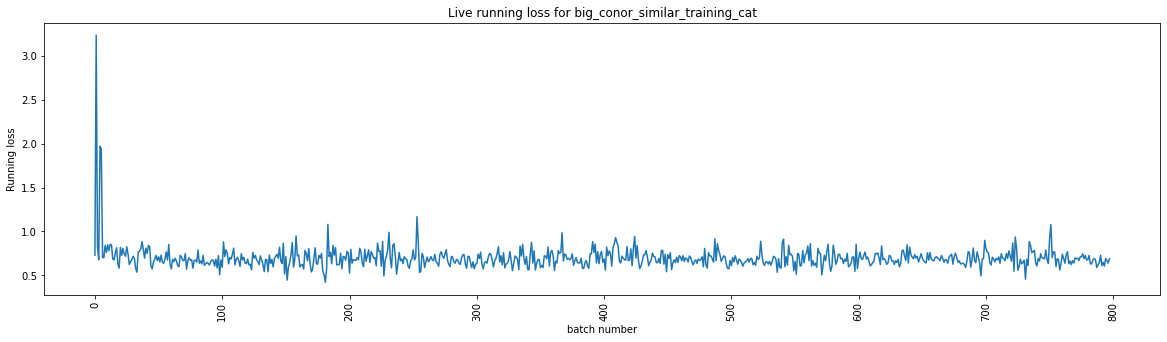

Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0


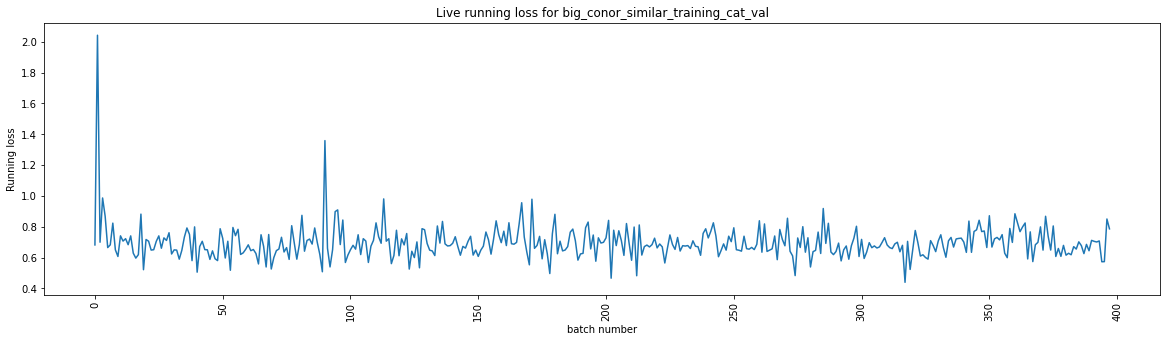

Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0


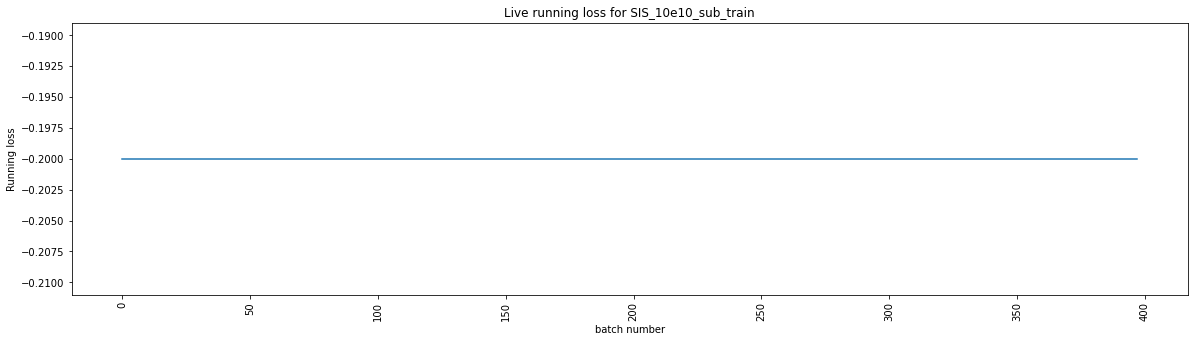

hard coded shown metrics at _plot_concatedated_data in substructure_classifier_development.py
Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0


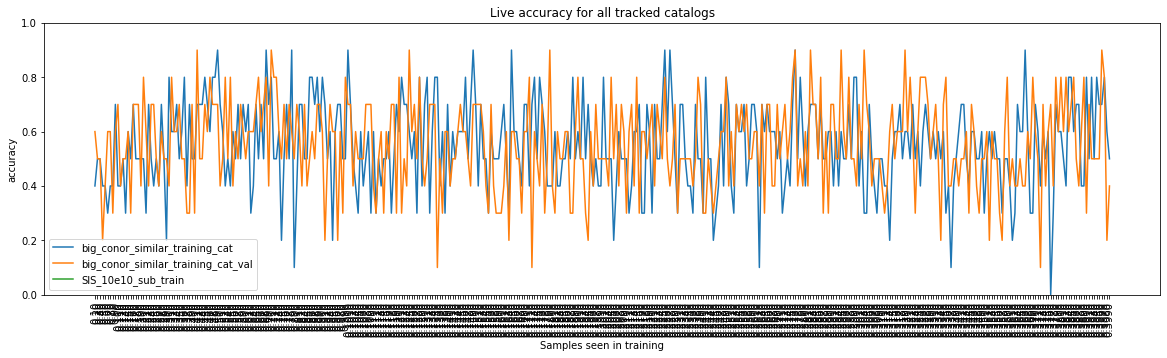

Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0


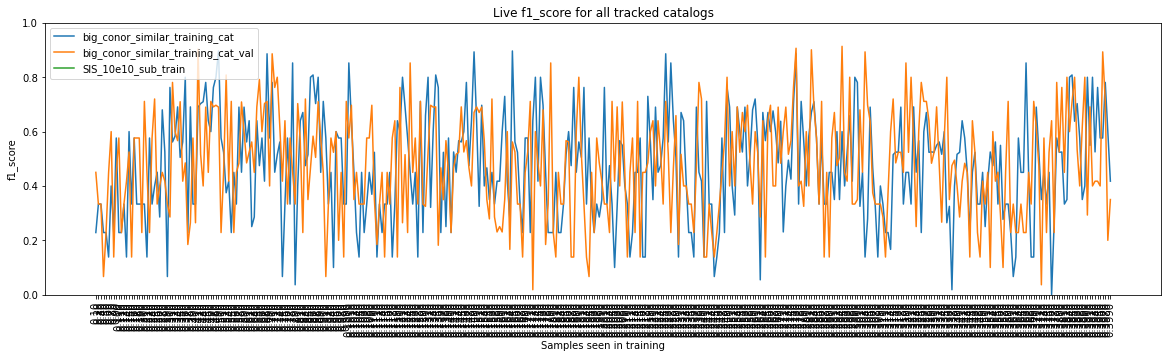

Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0


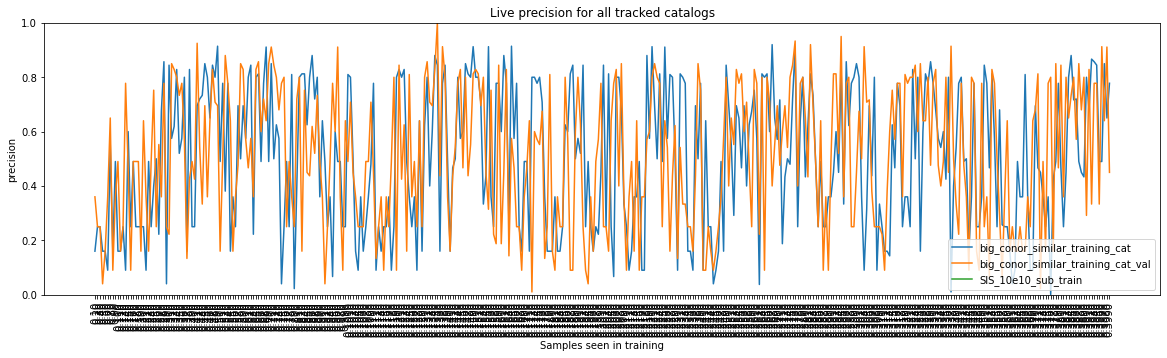

Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Live metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0
Offline metrics not found for stage 084172101d33dfad82e696b9985d049604feaf4ddbc89b04a1670f142460bda0


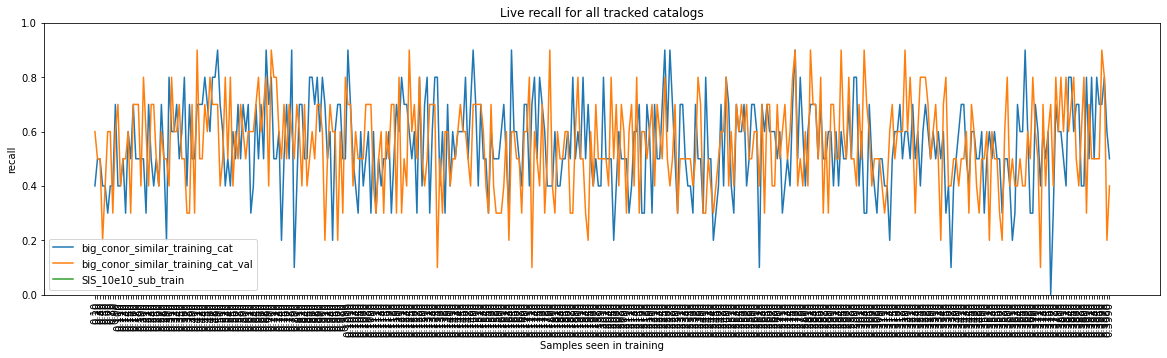

In [1]:
from substructure_classifier.substructure_classifier_development import SubstructureClassifier

my_classifier=SubstructureClassifier(classifier_name="first_vision_transformer")
my_classifier._plot_concatenated_data()

['3be82b9fee45b39872d47dcb524bcd2cf33a05fa92978407fc4832fff399ed7b', '1172687e1b42fc5363eb08dc5e111487ebb9b7b7e2ee396aa980204297b2ac18', '5320eef50240d2c1ef3f94d137427731291ec5f56688ef19504afafe65f46316']
5320eef50240d2c1ef3f94d137427731291ec5f56688ef19504afafe65f46316
3be82b9fee45b39872d47dcb524bcd2cf33a05fa92978407fc4832fff399ed7b
[[ 0. -1.  0.]
 [ 1.  0. -1.]
 [ 0.  1.  0.]]


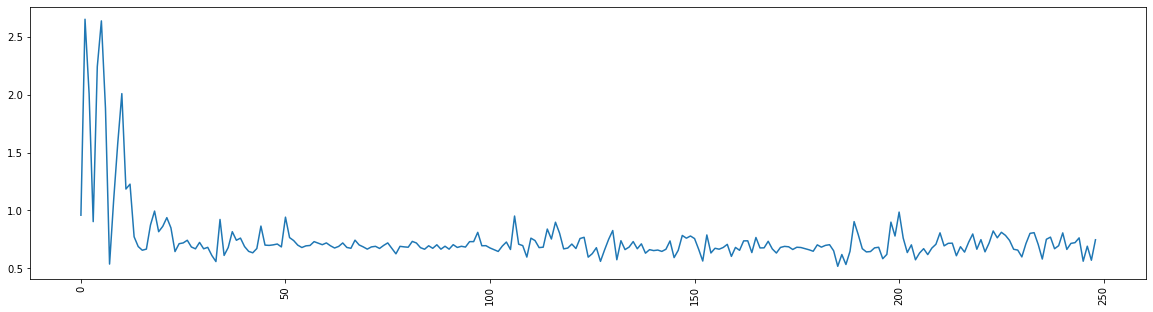

In [4]:
from matplotlib import pyplot as plt
import numpy as np

print(my_classifier.graph.get_nodes_list())
print(my_classifier.graph.find_origin_node())
print(my_classifier.classifier_properties.active_stage_id)
print (my_classifier.graph.custom_matrix)
x_axis, merged_dict=my_classifier.show_live_stage_history( metric="running_loss")
x_axis_running_loss=np.arange(0, len(merged_dict["big_conor_similar_training_cat"]))
plt.figure(figsize=(20, 5))
                                
plt.plot(x_axis_running_loss, merged_dict["big_conor_similar_training_cat"])
plt.xticks(rotation=90)  # Orient the x-axis ticks vertically
plt.show()

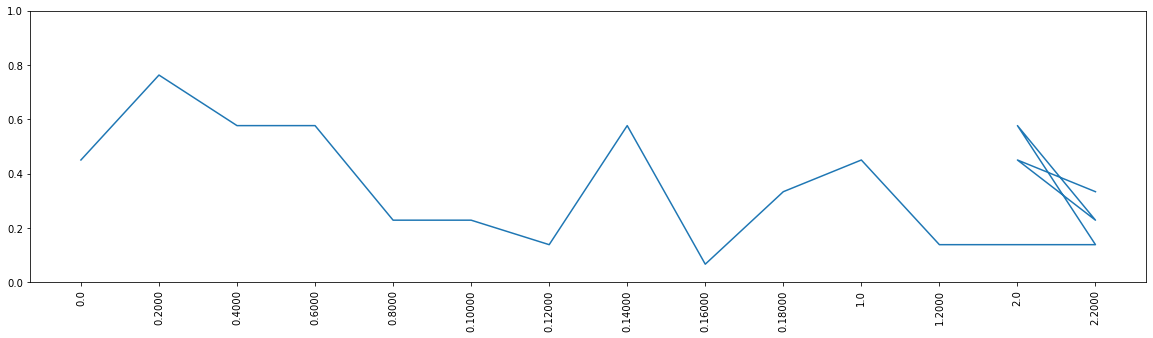

In [6]:
plt.figure(figsize=(20, 5))
x_axis, merged_dict=my_classifier.show_live_stage_history( metric="running_f1_score")

plt.plot(x_axis, merged_dict["big_conor_similar_training_cat"])
plt.ylim(0.0,1.0)
plt.xticks(rotation=90)  # Orient the x-axis ticks vertically
plt.show()